In [16]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Define data

In [31]:
with open('position_error_log.csv', 'r', newline='') as error_log:
    reader = csv.reader(error_log)
    header = next(reader)
    
    datadict = {header[i]: [] for i in range(len(header))}
    datadict['Request Number'] = []
    datadict['Cumulative Poses'] = []
    
    datarray = []
    
    request_number, cumulative_poses = 0, 0
    
    for row in reader:
        datarray.append(row)
        
        datadict['Pose Number'].append(int(row[0]))
        
        if int(row[0]) == 1:
            request_number += 1
        
        cumulative_poses += 1
        
        datadict['Request Number'].append(request_number)
        datadict['Cumulative Poses'].append(cumulative_poses)
        
        datadict['EEx err'].append(eval(row[1])[0])
        datadict['EEy err'].append(eval(row[2])[0])
        datadict['EEz err'].append(eval(row[3])[0])
        
        datadict['Abs err'].append(float(row[4]))
        
        

In [35]:
print(datarray[2])

['3', '[ 2.05568425]', '[ 0.16370756]', '[ 1.25906333]', '2.4161701869739582']


- Color requests by overall quality?
- Color individual requests by absolute error?

In [21]:
header

['Pose Number', 'EEx err', 'EEy err', 'EEz err', 'Abs err']

<IPython.core.display.Javascript object>


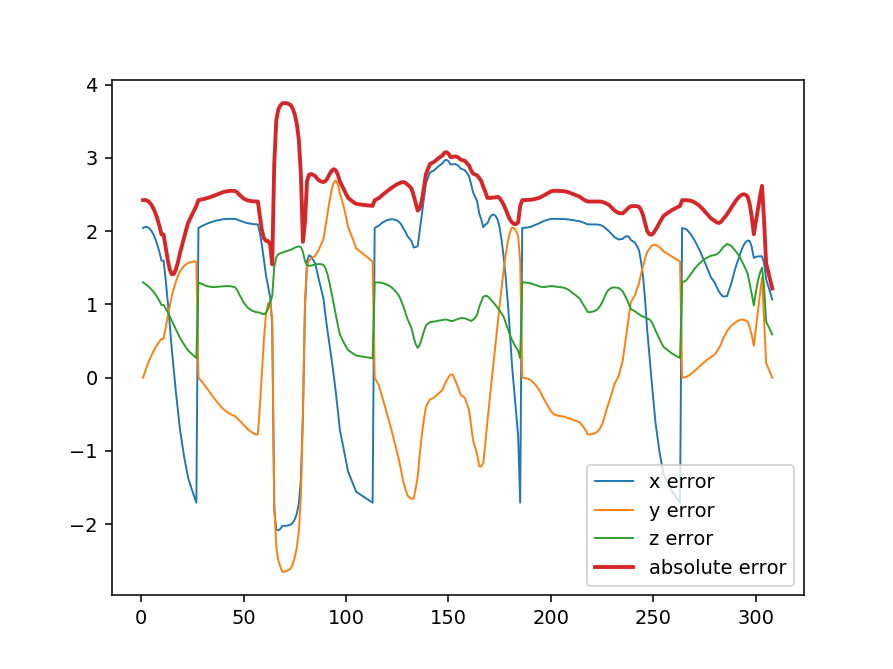

In [42]:
%matplotlib notebook
fig, ax = plt.subplots()
xError, = ax.plot(datadict['Cumulative Poses'], datadict['EEx err'], linewidth=1,
                 label='x error')
# xError.set_dashes(dashes)

yError, = ax.plot(datadict['Cumulative Poses'], datadict['EEy err'], linewidth=1,
                 label='y error')
zError, = ax.plot(datadict['Cumulative Poses'], datadict['EEz err'], linewidth=1,
                 label='z error')
absError, = ax.plot(datadict['Cumulative Poses'], datadict['Abs err'], linewidth=2,
                 label='absolute error')

ax.legend(loc='lower right')
plt.show()

In [ ]:
title = ('Calculated IK Solution End Effector Position Error')

# These are the colors that will be used in the plot
plt.
# Offsets for degree labels


# Load the data into a dataframe and us pd.melt to unpivot the degree column
df = pd.DataFrame(datadict)
df = pd.melt(df, var_name='', value_name='conferred')
df['Degree'] = [d.replace('_', ' ').title() for d in df.Degree]

# Define a formatter that works for both bokeh and matplotlib
def percent_format(x):
    try:
        return '{:0.0f}%'.format(x)
    except:
        return '%d%' % x

# Define the value dimensions
value_dim = hv.Dimension('conferred', value_format=percent_format, range=(0, 90))

# Define the dataset
ds = hv.Dataset(df, vdims=[value_dim])
curves = ds.to(hv.Curve, 'year', groupby='Degree').overlay()

# Define a function to get the text annotations
max_year = ds['year'].max()
def get_labels():
     return hv.NdOverlay({deg: hv.Text(max_year, ds[max_year, deg]+y_offsets.get(deg, 0),
                                        deg, halign='left', fontsize=10)(style=dict(color=col))
                            for deg, col in zip(df.Degree.unique(), color_sequence)})

## Display in matplotlib

In [5]:
# Define a callback to define a custom grid along the y-axis and disabling the (ugly) axis spines
def cb(plot, element):
    ax = plot.handles['axis']
    ax.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Define various options to adjust the plot
options = hv.Store.options(backend='matplotlib')
options.Curve = hv.Options('plot', show_frame=False, bgcolor='white', labelled=[], show_grid=False,
                           aspect=0.7, show_legend=False, xticks=5, final_hooks=[cb], fig_size=350)
options.Curve = hv.Options('style', color=hv.Cycle(values=color_sequence), linewidth=2)

(curves * get_labels()).relabel(title)

['2.4221429330851914',
 '2.424329180219976',
 '2.4161701869739582',
 '2.3956444973225492',
 '2.3610995265281809',
 '2.3113205201814151',
 '2.245586344340663',
 '2.1637106506855233',
 '2.0660637313118246',
 '1.9535727332064852',
 '1.953677389934974',
 '1.7781691027283535',
 '1.6106817350151377',
 '1.4781325740157472',
 '1.4094643701026406',
 '1.4153134719459315',
 '1.4784496895648027',
 '1.5755703887565788',
 '1.7005761177230696',
 '1.8074182260806271',
 '1.9201262145978897',
 '2.0168163178575154',
 '2.1134588425455574',
 '2.1727270297563313',
 '2.2311246817770289',
 '2.2883899877916569',
 '2.3442921913333454',
 '2.4221364398003979',
 '2.4280922742257474',
 '2.4341092338710992',
 '2.4406518789146623',
 '2.4480807327748413',
 '2.4566221427827983',
 '2.4663494959534584',
 '2.4765367643207656',
 '2.487500877816252',
 '2.4989234313227269',
 '2.5103848685498042',
 '2.5213853331228449',
 '2.5313710535824407',
 '2.5388611740513598',
 '2.5447342844919336',
 '2.5486340987200093',
 '2.55025472907

In [14]:
pd.melt?

In [29]:
float(2.07502553e-07)

2.07502553e-07

In [30]:
p = '[15]'
list(p)

['[', '1', '5', ']']